## Predicting the Sale Price of Bulldozers using Machine Learning

## 1. Problem definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous of how much similar bulldozers have been sold for ?


## 2. Data

The Data is dowloaded form kaggle Bluebook for Bulldozers competition

The data for this competition is split into three parts:

Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset


In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [11]:
# Import training and validation sets
df = pd.read_csv("TrainAndValid.csv", low_memory=False)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

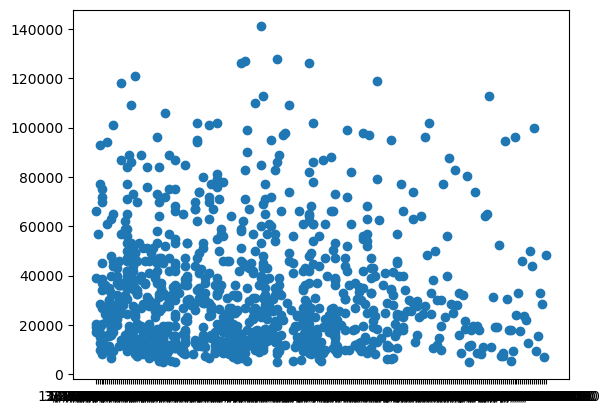

In [13]:

df.isna().sum()
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])


<AxesSubplot: ylabel='Frequency'>

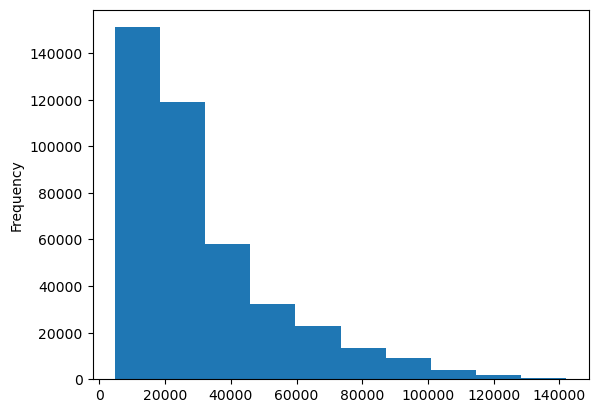

In [14]:
df.SalePrice.plot.hist()

### Parsing dates
When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.


In [15]:
# import data again but this time parse dates
df = pd.read_csv("TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [16]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

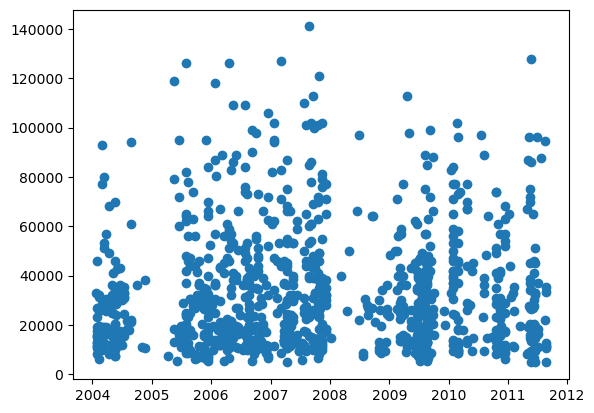

In [17]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [18]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [19]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [20]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the orginal DataFrame
We make a copy of orginal dataframe so when we manipulate the copy, we have still got our orginal data.

In [21]:
# Make a copy 
df_tmp = df.copy()

### Add datetime parameters for `saledate` column

In [22]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.day_of_year

In [23]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Now we've enriched our DataFrame with date time features, we can remove `saledate`

In [24]:
df_tmp.drop("saledate",axis=1,inplace=True)

In [25]:
# Check the values of different columns
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

We've done enough EDA (we could always do more) but let's start to do some model-driven EDA.

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,random_state=42)

X = df_tmp.drop("SalePrice",axis=1)
y = df_tmp["SalePrice"]

df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories


In [27]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [28]:
# Find the columns which contain strings
# This will return all of the string value into category values

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
       df_tmp[label] = content.astype("category").cat.as_ordered()

In [29]:
 df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data...

In [30]:
# Check missing data
df_tmp.isnull().sum() / len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

# Save preprocessed data

In [31]:
# Export current tmp dataframe
df_tmp.to_csv("train_tmp.csv",index=False)

In [32]:
# Import preprocessed data
df_tmp = pd.read_csv("train_tmp.csv",low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Fill mising values

### Fill numerical missing values first

In [33]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [34]:
# Check for which numeric columns have numm values and Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
       df_tmp[label+"_is_missing"] = pd.isnull(content)
       df_tmp[label] = content.fillna(content.median())

In [35]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and categorical variables into numbers


In [36]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():  
    if not pd.api.types.is_numeric_dtype(content):
         df_tmp[label+"_is_missing"] = pd.isnull(content)
         df_tmp[label] = pd.Categorical(content).codes + 1

In [37]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model

In [38]:
%%time
# Instatiate model

X = df_tmp.drop("SalePrice",axis=1)
y= df_tmp["SalePrice"]

model = RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(X,y)


CPU times: total: 13min 37s
Wall time: 55.7 s


RandomForestRegressor(n_jobs=-1, random_state=42)

### Spliting data into train/validation sets

In [39]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [40]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [41]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [42]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice",axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice",axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape


((401125, 102), (401125,), (11573, 102), (11573,))

### Building and evaluation function

In [46]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# Calculate root mean squared error between predictions and True labels
def rmsle(y_test, y_preds):
     return np.sqrt(mean_squared_log_error(y_test,y_preds))


# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    
    scores = {"Train MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds), 
              "Valid RMSLE": rmsle(y_valid, val_preds),
               "Trainig R^2":r2_score(y_train, train_preds),
                "Valid R^2": r2_score(y_valid, val_preds)}
    return scores
    

### Testing our model on a subset (to tune the hyperparameters)

In [49]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time

model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
model.fit(X_train, y_train)

CPU times: total: 25.1 s
Wall time: 1.82 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [50]:
scores = show_scores(model)
scores

{'Train MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Trainig R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with RandomizedSearchCV

In [54]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rg_grid = {"n_estimators": np.arange(10, 100, 10), "max_depth": [None,3, 5, 10],"min_samples_split": np.arange(2, 20, 2),"min_samples_leaf": np.arange(1, 20, 2),"max_features": [0.5, 1, "sqrt", "auto"] ,"max_samples":[10000]}

# Instantiate RandomizedSearchCV

model = RandomForestRegressor(n_jobs=-1, random_state=42)
rs_model = RandomizedSearchCV(model,param_distributions=rg_grid, n_iter=5, cv=5, verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 10.1 s
Wall time: 18.7 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [56]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 16,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [57]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Train MAE': 9226.145814882344,
 'Valid MAE': 10747.661162970684,
 'Training RMSLE': 0.4023249516993291,
 'Valid RMSLE': 0.42404907953552595,
 'Trainig R^2': 0.6607954939132734,
 'Valid R^2': 0.6639803193504515}

### Train a model with the best hyperparametrs

**Note** There were found after 100 interations of `RandomizedSearchCV`

In [58]:
%%time

# Most ideal hyperparameters

ideal_model = RandomForestRegressor(n_estimators=40, min_samples_leaf=1, min_samples_split=14, max_features=0.5, n_jobs=-1, max_samples=None, random_state=42)

ideal_model.fit(X_train, y_train)

CPU times: total: 2min 29s
Wall time: 10.9 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [59]:
show_scores(ideal_model)

{'Train MAE': 2948.315825434379,
 'Valid MAE': 5950.031735445055,
 'Training RMSLE': 0.14439092978467358,
 'Valid RMSLE': 0.24598470030844577,
 'Trainig R^2': 0.9590248741369035,
 'Valid R^2': 0.8819626805520949}

# Make predictions on test data

#Import the test Data

In [100]:
df_test = pd.read_csv("Test.csv",low_memory=False, parse_dates=["saledate"])
df_test["saledate"]

0       2012-05-03
1       2012-05-10
2       2012-05-10
3       2012-05-10
4       2012-05-10
           ...    
12452   2012-10-24
12453   2012-10-24
12454   2012-10-24
12455   2012-10-24
12456   2012-09-19
Name: saledate, Length: 12457, dtype: datetime64[ns]

### Prepocessing the data (getting the test dataset in the same format as our training dataset)

In [101]:
def preprocess_data(df):
        df["saleYear"] = df.saledate.dt.year
        df["saleMonth"] = df.saledate.dt.month
        df["saleDay"] = df.saledate.dt.day
        df["saleDayOfWeek"] = df.saledate.dt.dayofweek
        df["saleDayOfYear"] = df.saledate.dt.day_of_year
        
        df.drop("saledate",axis=1, inplace=True)
        
        
        for label, content in df.items():
            if pd.api.types.is_numeric_dtype(content):
                if pd.isnull(content).sum():
                 df[label+"_is_missing"] = pd.isnull(content)
                 df[label] = content.fillna(content.median())
            if not pd.api.types.is_numeric_dtype(content):
                 df[label+"_is_missing"] = pd.isnull(content)
                 df[label] = pd.Categorical(content).codes + 1
        return df

In [102]:
# Process the test data
df_test = preprocess_data(df_test)

In [103]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [105]:
# Manually adjust df_test to have auctioneerID_is_missing column

df_test["auctioneerID_is_missing"] = False


,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True
Steering_Controls_is_missing,True,False,True,True,True


### Finally now our test dataframe has the same features as our training dataframe, we can make predictions !

In [107]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

C:\Users\Jakub\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [109]:
len(test_preds)

12457

In [110]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,22530.400452
1,1227844,22100.601689
2,1227847,51095.118261
3,1227848,64856.486375
4,1227863,51176.549345
...,...,...
12452,6643171,55054.960460
12453,6643173,15193.255888
12454,6643184,14249.157705
12455,6643186,21706.571163


In [111]:
df_preds.to_csv("test_predictions.csv",index=False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predict the target variable (SalePrice).

In [112]:
# Find feature importance of our best model

ideal_model.feature_importances_

array([3.49117212e-02, 2.07190258e-02, 4.06896569e-02, 2.00590833e-03,
       3.31640332e-03, 2.11826558e-01, 3.19541559e-03, 9.81145513e-04,
       3.97524726e-02, 5.97803061e-02, 6.03570291e-02, 4.88274265e-03,
       2.86216355e-02, 1.57143566e-01, 4.44462248e-02, 5.98894840e-03,
       2.06367367e-03, 1.36580505e-03, 2.89109445e-03, 3.92514048e-02,
       5.71262930e-04, 5.28107141e-04, 1.20734369e-03, 2.82616796e-04,
       1.34884861e-03, 2.41298433e-05, 2.12403439e-03, 4.41525474e-03,
       7.95050214e-04, 1.54470164e-04, 4.65817697e-03, 4.34433522e-03,
       2.67478371e-03, 7.39476491e-04, 7.18919408e-04, 1.29493844e-02,
       9.38654385e-04, 1.18697232e-02, 7.16771819e-04, 2.42312738e-03,
       1.55192726e-03, 7.74130538e-04, 3.03528600e-03, 6.17782303e-04,
       3.79821720e-04, 3.58633099e-04, 1.53101306e-04, 1.53289209e-03,
       1.29682445e-03, 2.19789009e-04, 2.74114882e-04, 7.34604483e-02,
       3.76631966e-03, 5.61731186e-03, 2.90428257e-03, 9.89476406e-03,
      

In [117]:
# Helper function for plotting feature importance

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))


    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

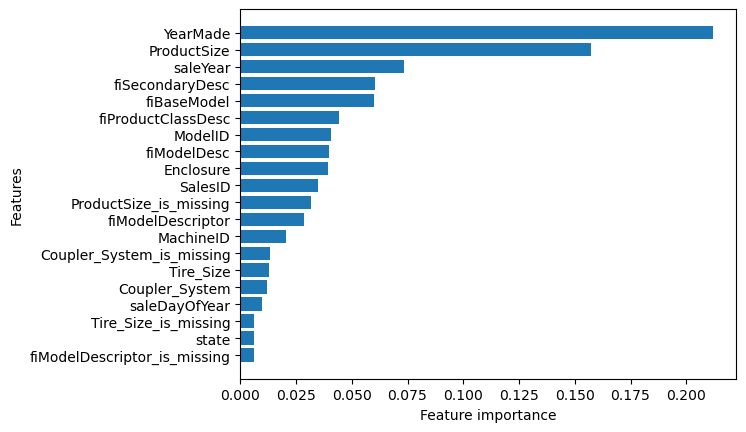

In [118]:
feature_importance = ideal_model.feature_importances_
plot_features(X_train.columns,feature_importance)

**Question to finish:** Why might knowing the feature importances of a trained machine learning model be helpful ?